# Applied ML : Assignment 1
## SMS Spam Classification
## Rohit Roy | MDS202340

### Training and Testing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

There are 8 functions as follows : 
* `load_splits` - reading the train, test and validation data
* `fit_model` - fitting Naive Bayes model on the training data
* `score_model` - returning the predicted values
* `evaluate_predictions` - returning evaluations by `score_model` function
* `plot_confusion_matrix` - plotting confusion matrix
* `validate_model` - getting results and confusion matrix from the model
* `fine_tune_model` - fine tuning of the Naive Bayes model
* `benchmark_models` - testing 3 benchmark models : LogisticRegression, NaiveBayes, RandomForest

In [2]:
def load_splits():
    """
    Load the train, validation, and test splits from CSV files.
    """
    train_df = pd.read_csv('train.csv')
    val_df = pd.read_csv('validation.csv')
    test_df = pd.read_csv('test.csv')
    return train_df, val_df, test_df

def fit_model(train_df):
    """
    Fit a Naive Bayes model on the training data.
    """
    vectorizer = CountVectorizer()
    X_train = vectorizer.fit_transform(train_df['message'])
    y_train = train_df['label']
    model = MultinomialNB()
    model.fit(X_train, y_train)
    return model, vectorizer

def score_model(model, vectorizer, df):
    """
    Score the model on the given data.
    """
    X = vectorizer.transform(df['message'])
    y = df['label']
    y_pred = model.predict(X)
    return y_pred

def evaluate_predictions(y_true, y_pred):
    """
    Evaluate the model predictions using accuracy, precision, recall, and F1 score.
    """
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred)
    }
    return metrics

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    """
    Plot a confusion matrix using Seaborn.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def validate_model(model, vectorizer, train_df, val_df):
    """
    Validate the model by scoring and evaluating on train and validation data.
    """
    # Score and evaluate on train data
    y_train_pred = score_model(model, vectorizer, train_df)
    train_metrics = evaluate_predictions(train_df['label'], y_train_pred)
    plot_confusion_matrix(train_df['label'], y_train_pred, title="Train Confusion Matrix")
    
    # Score and evaluate on validation data
    y_val_pred = score_model(model, vectorizer, val_df)
    val_metrics = evaluate_predictions(val_df['label'], y_val_pred)
    plot_confusion_matrix(val_df['label'], y_val_pred, title="Validation Confusion Matrix")
    
    return train_metrics, val_metrics

def fine_tune_model(train_df, val_df):
    """
    Fine-tune hyperparameters using GridSearchCV.
    """
    vectorizer = CountVectorizer()
    X_train = vectorizer.fit_transform(train_df['message'])
    y_train = train_df['label']
    
    param_grid = {'alpha': [0.01, 0.1, 1.0]}
    model = MultinomialNB()
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='f1')
    grid_search.fit(X_train, y_train)
    
    return grid_search.best_estimator_, vectorizer

def benchmark_models(train_df,test_df):
    """
    Score three benchmark models on the test data and select the best one.
    """
    
    models = {
        'Naive Bayes': MultinomialNB(),
        'Logistic Regression': LogisticRegression(max_iter=1000),  # Increased max_iter for convergence
        'Random Forest': RandomForestClassifier()
    }
    
    vectorizer = CountVectorizer()
    X_train = vectorizer.fit_transform(train_df['message'])
    y_train = train_df['label']
    X_test = vectorizer.transform(test_df['message'])
    y_test = test_df['label']
    
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        metrics = evaluate_predictions(y_test, y_pred)
        results[name] = metrics
        plot_confusion_matrix(y_test, y_pred, title=f"{name} Confusion Matrix")
    
    best_model = max(results, key=lambda k: results[k]['f1'])
    return best_model, results

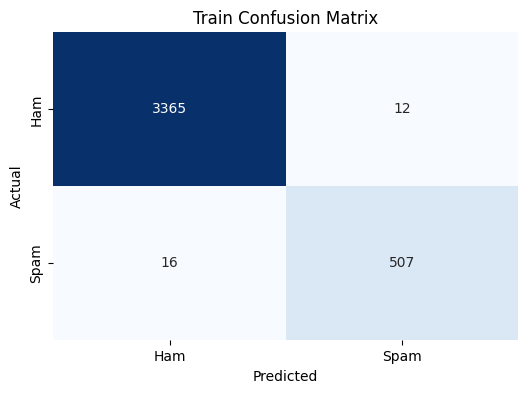

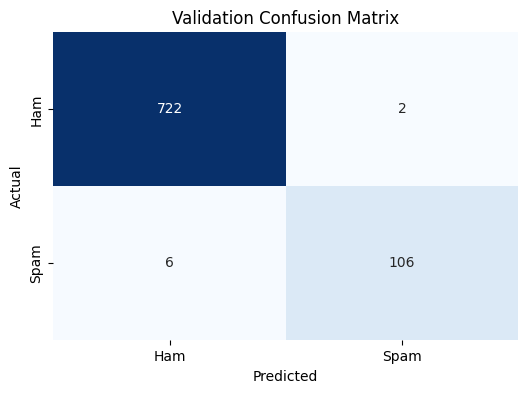

Initial Naive Bayes Model - Train Metrics: {'accuracy': 0.9928205128205129, 'precision': 0.976878612716763, 'recall': 0.9694072657743786, 'f1': 0.9731285988483686}
Initial Naive Bayes Model - Validation Metrics: {'accuracy': 0.9904306220095693, 'precision': 0.9814814814814815, 'recall': 0.9464285714285714, 'f1': 0.9636363636363636}


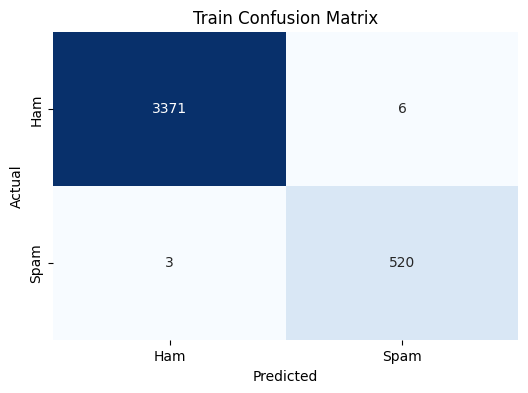

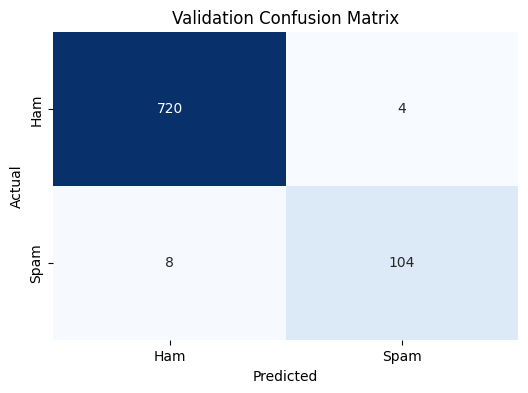

Fine-Tuned Naive Bayes Model - Train Metrics: {'accuracy': 0.9976923076923077, 'precision': 0.9885931558935361, 'recall': 0.994263862332696, 'f1': 0.9914204003813155}
Fine-Tuned Naive Bayes Model - Validation Metrics: {'accuracy': 0.9856459330143541, 'precision': 0.9629629629629629, 'recall': 0.9285714285714286, 'f1': 0.9454545454545454}


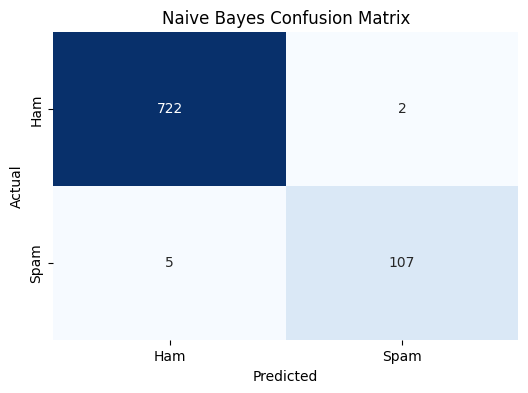

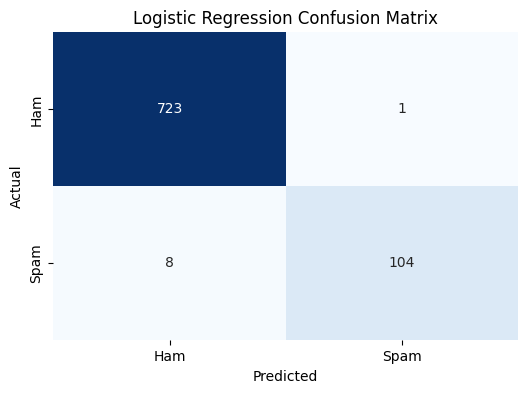

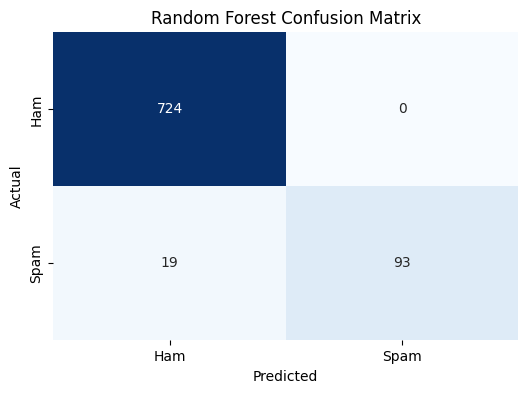

Benchmark Results: {'Naive Bayes': {'accuracy': 0.9916267942583732, 'precision': 0.981651376146789, 'recall': 0.9553571428571429, 'f1': 0.9683257918552036}, 'Logistic Regression': {'accuracy': 0.9892344497607656, 'precision': 0.9904761904761905, 'recall': 0.9285714285714286, 'f1': 0.9585253456221198}, 'Random Forest': {'accuracy': 0.9772727272727273, 'precision': 1.0, 'recall': 0.8303571428571429, 'f1': 0.9073170731707317}}
Best Model: Naive Bayes


In [3]:
train_df, val_df, test_df = load_splits()

# Fit and validate the initial model
model, vectorizer = fit_model(train_df)
train_metrics, val_metrics = validate_model(model, vectorizer, train_df, val_df)
print("Initial Naive Bayes Model - Train Metrics:", train_metrics)
print("Initial Naive Bayes Model - Validation Metrics:", val_metrics)

# Fine-tune the model
best_model, vectorizer = fine_tune_model(train_df, val_df)
train_metrics, val_metrics = validate_model(best_model, vectorizer, train_df, val_df)
print("Fine-Tuned Naive Bayes Model - Train Metrics:", train_metrics)
print("Fine-Tuned Naive Bayes Model - Validation Metrics:", val_metrics)

# Benchmark models on test data
best_model_name, benchmark_results = benchmark_models(train_df,test_df)
print("Benchmark Results:", benchmark_results)
print("Best Model:", best_model_name)